<a href="https://colab.research.google.com/github/glencode/glencode/blob/main/creevslilimar1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
bs = 32  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = './classes/'

In [6]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes)            

There are  2 classes:
 ['lilimar', 'cree']


In [7]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

Class: lilimar


cannot identify image file <_io.BufferedReader name='classes/lilimar/vector16.svg'>
cannot identify image file <_io.BufferedReader name='classes/lilimar/vector14.svg'>
cannot identify image file <_io.BufferedReader name='classes/lilimar/vector3.svg'>
cannot identify image file <_io.BufferedReader name='classes/lilimar/vector.svg'>
cannot identify image file <_io.BufferedReader name='classes/lilimar/vector6.svg'>
cannot identify image file <_io.BufferedReader name='classes/lilimar/vector4.svg'>
cannot identify image file <_io.BufferedReader name='classes/lilimar/vector13.svg'>
cannot identify image file <_io.BufferedReader name='classes/lilimar/vector5.svg'>
cannot identify image file <_io.BufferedReader name='classes/lilimar/vector12.svg'>
cannot identify image file <_io.BufferedReader name='classes/lilimar/vector10.svg'>
cannot identify image file <_io.BufferedReader name='classes/lilimar/vector7.svg'>
cannot identify image file <_io.BufferedReader name='classes/lilimar/vector11.svg'>

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:1015: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")


Class: cree


cannot identify image file <_io.BufferedReader name='classes/cree/vector14.svg'>
cannot identify image file <_io.BufferedReader name='classes/cree/vector.svg'>
cannot identify image file <_io.BufferedReader name='classes/cree/vector3.svg'>
cannot identify image file <_io.BufferedReader name='classes/cree/vector6.svg'>
cannot identify image file <_io.BufferedReader name='classes/cree/vector4.svg'>
cannot identify image file <_io.BufferedReader name='classes/cree/vector13.svg'>
cannot identify image file <_io.BufferedReader name='classes/cree/vector5.svg'>
cannot identify image file <_io.BufferedReader name='classes/cree/vector12.svg'>
cannot identify image file <_io.BufferedReader name='classes/cree/vector7.svg'>
cannot identify image file <_io.BufferedReader name='classes/cree/vector10.svg'>
cannot identify image file <_io.BufferedReader name='classes/cree/vector11.svg'>
cannot identify image file <_io.BufferedReader name='classes/cree/vector15.svg'>
cannot identify image file <_io.Buf

In [8]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  return _solve_func(B,A)[0][:,0]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for deta

In [9]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 315 training images and 78 validation images.


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

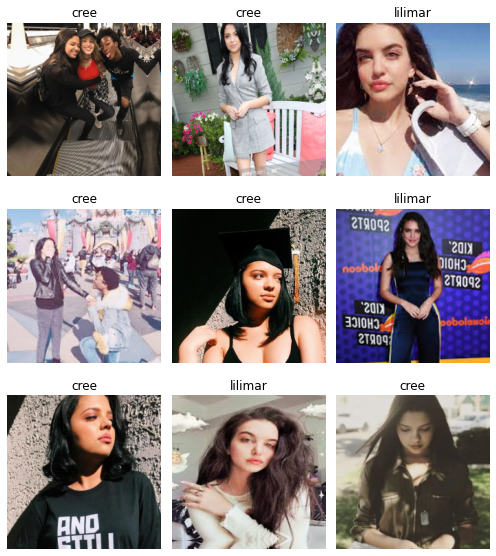

In [10]:
data.show_batch(rows=3, figsize=(7,8))

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


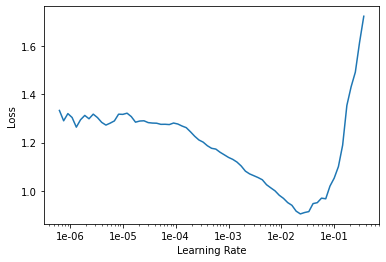

In [12]:
learn.lr_find();
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.999407,1.092809,0.679487,01:49
1,1.010132,1.327561,0.679487,01:47
2,0.756655,0.676845,0.769231,01:49


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

KeyboardInterrupt: ignored